In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(os.path.join('E:/machine_data/Titanic Machine Learning from Disaster/train.csv'))
test = pd.read_csv(os.path.join('E:/machine_data/Titanic Machine Learning from Disaster/test.csv'))

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.describe()

D:\anaconda1\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df=train

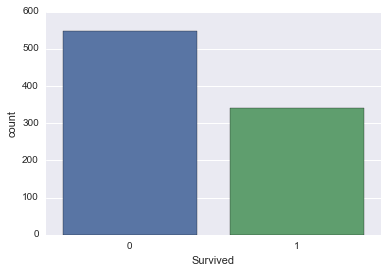

In [7]:
#sns.countplot(train['Survived'])
sns.countplot(df.Survived)

In [8]:
#查看一下Pclass各种情况下，survived的情况
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [9]:
print('survival summarised for each Pclass')
df.Survived.groupby(df.Pclass).agg(['mean', 'count'])

survival summarised for each Pclass


,mean,count
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


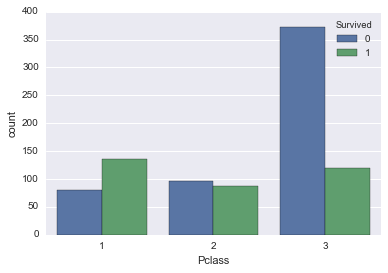

In [10]:
sns.countplot(train['Pclass'], hue=train['Survived'])

In [11]:
#-----------------------------------------
#下面来查看各属性的实际情况，及其对survived的影响
#-----------------------------------------

In [12]:
# Name属性:

In [13]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [14]:
#查看一下称呼的开头
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Jonkheer.      1
Lady.          1
Don.           1
the            1
Sir.           1
Capt.          1
Mme.           1
Ms.            1
Name: Name_Title, dtype: int64

In [15]:
#查看新变量Name_Title对survived的影响
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [16]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
[12, 19]    0.220588
(19, 23]    0.301282
(23, 27]    0.319797
(27, 32]    0.442424
(32, 82]    0.674556
Name: Survived, dtype: float64

In [17]:
pd.qcut(train['Name_Len'],5).value_counts()

[12, 19]    204
(23, 27]    197
(32, 82]    169
(27, 32]    165
(19, 23]    156
Name: Name_Len, dtype: int64

In [18]:
#Sex 属性：

In [19]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [20]:
#从这条分析中可以看出，female获救的可能性比较大
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [21]:
# Age属性：

In [22]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [23]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
[0.42, 19]    0.481707
(19, 25]      0.328467
(25, 31.8]    0.393701
(31.8, 41]    0.437500
(41, 80]      0.373239
Name: Survived, dtype: float64

In [24]:
pd.qcut(train['Age'],5).value_counts()

[0.42, 19]    164
(31.8, 41]    144
(41, 80]      142
(19, 25]      137
(25, 31.8]    127
Name: Age, dtype: int64

In [25]:
#SibSp 属性：

In [26]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [27]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
#Parch 属性：

In [29]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [30]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [31]:
# Ticket属性：

In [32]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [33]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [34]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [35]:
##查看新变量NTicket_Lett对survived的影响
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [36]:
# Fare属性：

In [37]:
pd.qcut(train['Fare'], 3).value_counts()

[0, 8.662]       308
(26, 512.329]    295
(8.662, 26]      288
Name: Fare, dtype: int64

In [38]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
[0, 8.662]       0.198052
(8.662, 26]      0.402778
(26, 512.329]    0.559322
Name: Survived, dtype: float64

In [39]:
#Looking at the relationship between Class and Fare, we do indeed see a clear relationship.
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"[0, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [40]:
# cabin属性：

In [41]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [42]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [43]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [49]:
#取出Cabin的标号 
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
print(train['Cabin_num'].head())
print ('-'*25)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
train['Cabin_num'].head()

0    NaN
1     85
2    NaN
3    123
4    NaN
Name: Cabin_num, dtype: object
-------------------------


0      NaN
1     85.0
2      NaN
3    123.0
4      NaN
Name: Cabin_num, dtype: float64

In [45]:
data=train
data['Cabin_num'] = pd.qcut(data['Cabin_num'],3)
data = pd.concat((data, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Cabin_num,"Cabin_num_[2, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr.,23,9,A,n,NaN,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs.,51,8,P,C,"(65.667, 148]",0.0,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss.,22,16,S,n,NaN,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs.,44,6,1,C,"(65.667, 148]",0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr.,24,6,3,n,NaN,0.0,0.0,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,Mr.,16,6,3,n,NaN,0.0,0.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,Mr.,23,5,1,E,"(28.667, 65.667]",0.0,1.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,Master.,30,6,3,n,NaN,0.0,0.0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,Mrs.,49,6,3,n,NaN,0.0,0.0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,Mrs.,35,6,2,n,NaN,0.0,0.0,0.0


In [50]:
pd.qcut(train['Cabin_num'],3).value_counts()

(65.667, 148]       67
[2, 28.667]         67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [51]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
[2, 28.667]         0.716418
(28.667, 65.667]    0.651515
(65.667, 148]       0.641791
Name: Survived, dtype: float64

In [52]:
train['Survived'].corr(train['Cabin_num'])

-0.063845959227893531

In [53]:
# Embarked属性：

In [54]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

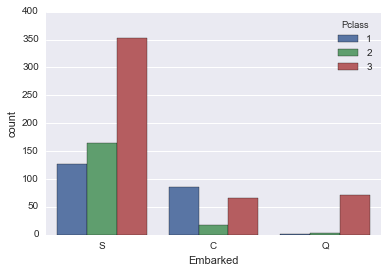

In [56]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

In [57]:
#-------------------------------
#重点来了!!!!
#Feature engineering
#-------------------------------

In [58]:
#1、根据Name属性创建两个新的属性：Name_Len,Name_Title
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [59]:
#2、通过填写乘客相应的职称和班级的平均值来估算“年龄”栏的空值,这样比单纯的取年龄的平均值要准确一点
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [60]:
data=train.groupby(['Name_Title', 'Pclass'])['Age']
j=1
for i in data:
    while j<6:
        print (i)
        print ('-'*20)
        j+=1

(('Capt.', 1), 745    70.0
Name: Age, dtype: float64)
--------------------
(('Capt.', 1), 745    70.0
Name: Age, dtype: float64)
--------------------
(('Capt.', 1), 745    70.0
Name: Age, dtype: float64)
--------------------
(('Capt.', 1), 745    70.0
Name: Age, dtype: float64)
--------------------
(('Capt.', 1), 745    70.0
Name: Age, dtype: float64)
--------------------


In [61]:
#3、把属性 SibSp和属性Parch结合起来，形成一个新的属性 Family_size
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test


In [62]:
#4、形成了两个属性：Ticket号的首字母Ticket_Lett，Ticket号的长度Ticket_Len
#                Ticket_Lett取值范围为：['1', '2', '3', 'S', 'P', 'C', 'A']和'Low_ticket', 'Other_ticket'
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [63]:
data=train
data['Ticket_Lett'] = data['Ticket'].apply(lambda x: str(x)[0])
data['Ticket_Lett'] = data['Ticket_Lett'].apply(lambda x: str(x))
data['Ticket_Lett'] = np.where((data['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), data['Ticket_Lett'],
                                   np.where((data['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
data['Ticket_Lett'].value_counts()

3               301
2               183
1               146
S                65
P                65
C                47
Low_ticket       47
A                29
Other_ticket      8
Name: Ticket_Lett, dtype: int64

In [64]:
#5、生成新特征Cabin首字母
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [65]:
#6、生成新特征Cabin_num1： Cabin号，并把此号分区间，然后通过get_dummies把区间类别号进行编码
#   Nan代表编码值为全零
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [66]:
#Embarked 补缺省值，补上出现最频繁的值‘S’
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [67]:
#‘Fare'属性补上均值
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [68]:
#7、为一些类别属性进行编码
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [69]:
#去掉无用的属性：'PassengerId'
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [170]:
#主程序
train = pd.read_csv(os.path.join('E:/machine_data/Titanic Machine Learning from Disaster', 'train.csv'))
test = pd.read_csv(os.path.join('E:/machine_data/Titanic Machine Learning from Disaster', 'test.csv'))
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)

In [90]:
print(len(train.columns))

45


In [91]:
train.filter(regex='Cabin_num_.*').head(5)

,"Cabin_num_[2, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148]"
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0


In [73]:
#-----------------------------------------------------
#接下来另一个重点：Model Estimation and Evaluation
#-----------------------------------------------------

In [98]:
#1、利用随机森林进行预测，得出out-of-bag score（类似简单的交叉验证得分）
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [87]:
#看一看各个属性的重要性
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
12,Sex_female,0.111215
11,Sex_male,0.109769
33,Name_Title_Mr.,0.109746
1,Fare,0.088209
2,Name_Len,0.087904
0,Age,0.078651
8,Pclass_3,0.043268
35,Name_Title_Miss.,0.031292
7,Ticket_Len,0.031079
34,Name_Title_Mrs.,0.028852


In [99]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv(os.path.join('E:/machine_data/Titanic Machine Learning from Disaster', 'test.csv'))
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('E:/machine_data/Titanic Machine Learning from Disaster/test_result.csv', sep=",", index = False)

In [77]:
#2、利用xgboost进行预测，得出out-of-bag score（类似简单的交叉验证得分）

In [116]:
type(train)
train.head()

,Survived,Age,Fare,Name_Len,Age_Null_Flag,"Cabin_num_[2, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148]",Ticket_Len,Pclass_3,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,0,22.0,7.2500,23,0,0.0,0.0,0.0,9,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,38.0,71.2833,51,0,0.0,0.0,1.0,8,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,22,0,0.0,0.0,0.0,16,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,35.0,53.1000,44,0,0.0,0.0,1.0,6,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,35.0,8.0500,24,0,0.0,0.0,0.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [120]:
train.iloc[:,1:].head()

,Age,Fare,Name_Len,Age_Null_Flag,"Cabin_num_[2, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148]",Ticket_Len,Pclass_3,Pclass_1,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,22.0,7.2500,23,0,0.0,0.0,0.0,9,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.0,71.2833,51,0,0.0,0.0,1.0,8,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,7.9250,22,0,0.0,0.0,0.0,16,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,35.0,53.1000,44,0,0.0,0.0,1.0,6,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,8.0500,24,0,0.0,0.0,0.0,6,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
#xgboost回归
import xgboost as xgb
xlf = xgb.XGBRegressor(max_depth=10, 
                        learning_rate=0.1, 
                        n_estimators=10, 
                        silent=True, 
                        objective='reg:linear', 
                        nthread=-1, 
                        gamma=0,
                        min_child_weight=1, 
                        max_delta_step=0, 
                        subsample=0.85, 
                        colsample_bytree=0.7, 
                        colsample_bylevel=1, 
                        reg_alpha=0, 
                        reg_lambda=1, 
                        scale_pos_weight=1, 
                        seed=1440, 
                        missing=None)
X_train=train.iloc[:, 1:].values
y_train=train.iloc[:, 0].values
xlf.train(X_train, y_train, eval_metric='rmse', verbose = True)



XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1440, silent=True, subsample=0.85)

In [134]:
predictions=xlf.predict(test.values)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv(os.path.join('E:/machine_data/Titanic Machine Learning from Disaster', 'test.csv'))
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('E:/machine_data/Titanic Machine Learning from Disaster/test_result1.csv', sep=",", index = False)

In [171]:
#xgboost分类
import xgboost as xgb
xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.8,
    'silent': 1,
    'subsample': 0.6,
    'learning_rate': 0.01,
    'objective': 'reg:linear',
    'max_depth': 1,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'rmse',
}
dtrain=xgb.DMatrix(train.iloc[:, 1:].values, label=train.iloc[:, 0].values)
xgboost_model=xgb.train(xgb_params,dtrain,1000)

In [172]:
predictions=xgboost_model.predict(xgb.DMatrix(test.values)) #返回的是属于正类的概率
for i in range(len(predictions)):
    if predictions[i]>=0.5:
        predictions[i]=1
    else:
        predictions[i]=0
predictions=predictions.astype(np.int32)
print (predictions)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv(os.path.join('E:/machine_data/Titanic Machine Learning from Disaster', 'test.csv'))
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('E:/machine_data/Titanic Machine Learning from Disaster/test_result1.csv', sep=",", index = False)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 1]


In [150]:
predictions=predictions.astype(np.int32)

array([ 0.09393176,  0.57349229,  0.21283644,  0.07936296,  0.65053332,
        0.03898412,  0.50829959,  0.32421562,  0.70670325,  0.13440943,
        0.19377524,  0.08834955,  0.98137021,  0.22630787,  0.90581715,
        0.72718084,  0.30636173,  0.15749472,  0.62179106,  0.69419837,
        0.31383756,  0.4264217 ,  0.78391165,  0.36557388,  0.72033846,
        0.08648938,  0.94275391,  0.17968872,  0.36836553,  0.18718413,
        0.20118013,  0.20823768,  0.6686036 ,  0.50879723,  0.47292849,
        0.18642235,  0.57308239,  0.57308239,  0.08297449,  0.30721214,
        0.08564872,  0.37930238,  0.16862389,  0.8284961 ,  1.01836014,
        0.19922763,  0.35836637,  0.09888113,  1.03862524,  0.685197  ,
        0.47577408,  0.22366136,  0.70239216,  0.67069   ,  0.19306761,
        0.11347303,  0.08191311,  0.18278122,  0.19490129,  0.94456637,
        0.08191311,  0.19386813,  0.02761263,  0.68625396,  0.4456653 ,
        0.84766579,  0.58891082,  0.29171085,  0.41976896,  0.71

In [92]:
#3、利用SVC进行预测
from sklearn import svm
svcClf = svm.SVC(C=0.5,kernel='rbf',gamma=0.001)
svcClf.fit(train.iloc[:, 1:], train.iloc[:, 0])


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv(os.path.join('E:/machine_data/Titanic Machine Learning from Disaster', 'test.csv'))
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('E:/machine_data/Titanic Machine Learning from Disaster/test_result1.csv', sep=",", index = False)